In [1]:
from colradlumo_library import * 
import matplotlib.pyplot as plt

In [2]:
f = np.loadtxt('measured_spec/AT2017gfo_ENGRAVE_v1.0_XSHOOTER_MJD-57990.000_Phase+7.40d_deredz.dat')
parsec_cm = 3.086e+18

d_Mpc = 40 
d_cm = d_Mpc * 1e6 * parsec_cm
d_cm_squared = d_cm*d_cm

wl_ang = f[:,0]
wl_mic = f[:,0]*1e-4

flux = f[:,1]
lumo_ergs_s_ang = flux *4*np.pi*d_cm_squared


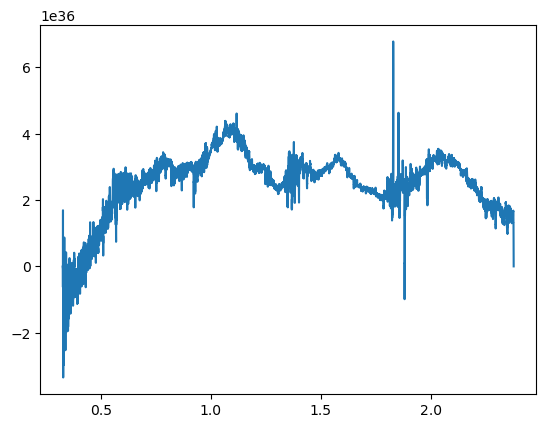

In [3]:
plt.plot(wl_mic,lumo_ergs_s_ang)

In [49]:
from colradlumo_library import * 

adf04_path = '/Users/leomulholland/SrII/das8_adf04/adf04'
dens_cm_3 = 3.9e8
temp_k = 3500
temp_ev = temp_k / 11600
mass_number_sr_ii = 87.62 #nuclear units


In [50]:
sr_ii_lumo_rmatrix_1e6_025 = colradlumo_calc(adf04_path,dens_cm_3,temp_ev,atomic_mass_number=mass_number_sr_ii)

No ionization in the input file ECIP can be made
ECIP was not previously calculated, calculating now from inside 'suppliment_with_ecip'
adf04 file specifies no ionization rates but you requested ECIP, the adf04 file creatormost likely forgot about specify this (looking at you R-matrix people). Blindly creatingECIP rates for every transition, you don't want this specify in the file which levelsshould and should not have ionization rates.
ColRadPy cpu time (sec) -    0.06


/Users/leomulholland/colrad_lumo/ColRadPy/colradpy/colradpy_class.py:1184: RuntimeWarning: divide by zero encountered in scalar divide
  self.data['processed']['wave_vac'].append(1.e7/abs(self.data['atomic']['energy'][levels_to_keep[j]]\


In [55]:
mass_sr_ii_solar = 5e-4
sr_ii_lumo_rmatrix_1e6_025.scale_lumo_by_ion_mass(mass_sr_ii_solar)

In [56]:
requested_lines = sr_ii_lumo_rmatrix_1e6_025.select_strongest_n_lines(10)
requested_lines.display()

----------------------------------------------------------------------------------------------------------------------------------------
wlvac(nm),  transition,     E_j (cm-1),         Level j,     E_i (cm-1),        Level i, A_ij(s^-1), pec cm^3/s,   L (ph/s),  L (erg/s)
----------------------------------------------------------------------------------------------------------------------------------------
   407.88,      1 -  5,          0.000,     5s(2S)  0.5,      24517.000,    5p(2P)  1.5,   1.58E+08,   1.35E-10,   3.56E+50,   1.74E+39
   421.67,      1 -  4,          0.000,     5s(2S)  0.5,      23715.000,    5p(2P)  0.5,   1.44E+08,   1.01E-10,   2.67E+50,   1.26E+39
   674.04,      1 -  3,          0.000,     5s(2S)  0.5,      14836.000,    4d(2D)  2.5,   2.91E+00,   4.09E-11,   1.08E+50,   3.19E+38
   687.00,      1 -  2,          0.000,     5s(2S)  0.5,      14556.000,    4d(2D)  1.5,   2.62E+00,   2.76E-11,   7.29E+49,   2.11E+38
  1032.95,      3 -  5,      14836.000,     4d

In [57]:
spec = 2.9e36*np.ones(len(wl_mic))
for (index,wavelength) in enumerate(requested_lines.wl_vac_nm):

    new_spec = gaussian(wavelength,0.07,wl_mic*1000)
    norm_factor = trap(wl_mic*10_000,new_spec) / requested_lines.lumo_erg[index]
    new_spec /= norm_factor
    #print(norm_factor)

    #print(trap(wl_mic*10_000,new_spec))

    spec += new_spec

(0.0, 1e+37)

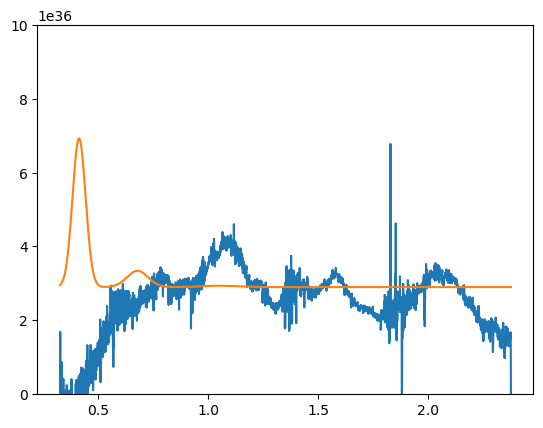

In [58]:
plt.plot(wl_mic,lumo_ergs_s_ang)
plt.plot(wl_mic,spec)
plt.ylim([0,10e36])
